In [2]:
from model.resnet import UNet_ResNet
import torch
import numpy as np
import os

In [4]:
weights = torch.load('weights/resnet34/model/ResNet34_model210.pth', map_location = 'cpu')

In [5]:
model = UNet_ResNet()

In [6]:
model.load_state_dict(weights)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [7]:
import cv2

In [411]:
name = 'girl-plait-person-hair-40565.png'

In [412]:
img = cv2.cvtColor(cv2.imread('/home/kaichou/ssd/course/test/images/' + name), cv2.COLOR_BGR2RGB)

In [413]:
org_size = np.shape(img)

In [414]:
org_size

(800, 1200, 3)

In [415]:
data = cv2.resize(img, (512, 512))
data = np.transpose(data, (2, 0, 1))
data = np.expand_dims(data, axis = 0)
data = torch.from_numpy(data).float()

In [426]:
out = model(data.cpu())

In [427]:
out = (torch.sigmoid(out) > 0.9).cpu().squeeze(1).numpy()

In [428]:
out = cv2.resize(np.transpose(out, (1, 2, 0)), (org_size[1], org_size[0]))

In [429]:
import matplotlib.pyplot as plt

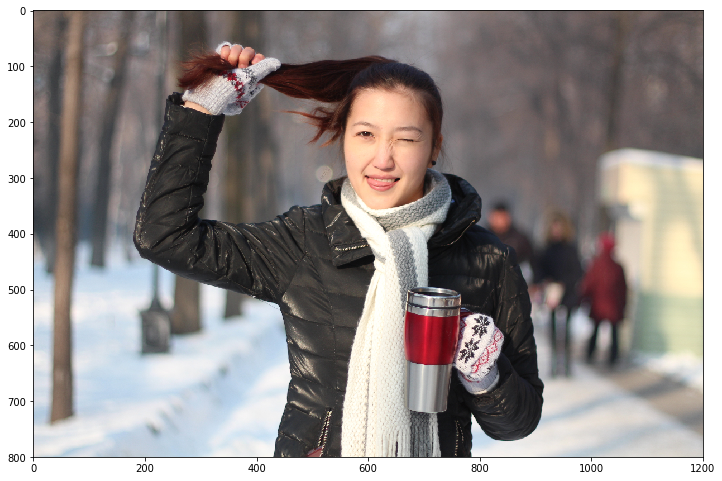

In [430]:
plt.figure(figsize=(12, 12))
plt.imshow(img)

In [431]:
np.shape(out)

(800, 1200)

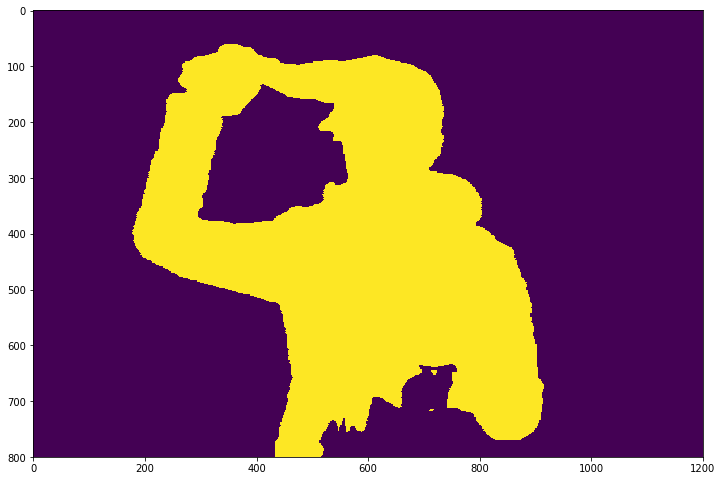

In [432]:
plt.figure(figsize=(12, 12))
plt.imshow(out)

In [433]:
mask = cv2.imread('/home/kaichou/ssd/course/test/masks/' + name.split('.')[0] + '.png', cv2.IMREAD_GRAYSCALE)

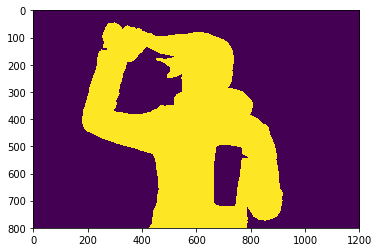

In [434]:
plt.imshow(mask)